### Adidas vs Nike - Clustering, Classification & Recommendation

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top

- The data contains following variables:

    - Product Name: Name of the product
    - Product ID: ID of the product
    - Listing Price: Listed price of the product
    - Sale Price: Sale price of the product
    - Discount: Percentage of discount on the product
    - Brand: Brand of the product
    - Description: Description of the product
    - Rating: Rating of the product
    - Reviews: Number of reviews for the product
    
#### Objective:
    
- Product Clustering
    - Cluster products & provide business insights & recommendations for each cluster
 
 
- Product Classification
    - Train & build machine learning models to predict the product cluster 
 
 
- Product Recommendation
    - Build a content based recommendation system to recommend products based on description 

In [1]:
# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# Libraries for text analytics
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter  import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

# to perform matrix decomposition
from sklearn.decomposition import TruncatedSVD

# For pre processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# To build model for prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# To get diferent metric scores
from sklearn.metrics import (
     f1_score,
     accuracy_score,
     recall_score,
     precision_score,
     confusion_matrix,
     plot_confusion_matrix,
     make_scorer,
     classification_report)

# For model explainability
import eli5

### Data Overview 

In [2]:
# Loading the dataset
data = pd.read_csv("Adidas Vs Nike.csv")

In [3]:
data.shape

(3268, 9)

- There are 3268 rows & 9 columns 

In [4]:
# 1st 5 rows of the data 
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,300,150,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,152,76,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,20,12,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,140,70,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,160,80,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72


In [5]:
# Fixing column names 
data.columns = [column_name.replace(' ','_') for column_name in data.columns]

In [6]:
data.head()

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,300,150,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,152,76,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,20,12,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,140,70,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,160,80,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72


In [7]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [8]:
# Checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 229.9+ KB


- Listing_Price, Sale_Price, Discount, Reviews are of integer datatype 
- Rating is of float datatype
- Product_Name, Product_ID, Brand & Description are of object type


- There are no missing values in any of the features

In [9]:
# Product_ID is a unqiue ID for each Product_Name and can be dropped 
df.drop('Product_ID', axis=1, inplace=True)

In [10]:
# Checking duplicate observations
df.duplicated().sum()

100

- There are 100 duplicate entries in the dataset, which will be removed 

In [11]:
df = df[(~df.duplicated())].copy()

In [12]:
df.shape

(3168, 8)

- There are now 3168 rows in the dataset

In [13]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3168.0,140.330808,93.346886,0.0,92.0,120.0,180.0,600.0
Sale_Price,3168.0,120.297348,83.844428,9.0,60.0,92.0,156.0,730.0
Discount,3168.0,27.724116,22.470490,0.0,0.0,40.0,50.0,60.0
Rating,3168.0,3.269949,1.387328,0.0,2.6,3.5,4.4,5.0
Reviews,3168.0,41.670139,31.344669,0.0,12.0,39.0,69.0,223.0


- The average Listing_Price is greater than median indicating distribution is right skewed. The minimum Listing_Price is 0 which is incorrect & will require further investigation
- Likewise, the average Sale_Price is greater than median indicating distribution is right skewed 
- The average discount is less than the median indicating the distribution is left skewed
- The average & median rating are somewhat similar although the median is slightly greater
- The average & median reviews are somewhat similar although the average is slightly greater

In [14]:
# Investigating rows with Listing_Price = 0
df[df['Listing_Price']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,351.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Sale_Price,351.0,225.065527,91.670177,32.0,160.0,220.0,285.0,730.0
Discount,351.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Rating,351.0,2.692308,2.177619,0.0,0.0,3.8,4.7,5.0
Reviews,351.0,7.914530,19.351887,0.0,0.0,1.0,6.0,223.0


- There are 351 rows with Listing_Price as 0. All of these rows also have Discount as 0, however, Sale_Price varies anywhere between \\$32 to \\$730
- For these rows, substitute Sale_Price as the Listing_Price 

In [15]:
df.loc[df.Listing_Price==0,'Listing_Price'] = df.loc[df.Listing_Price==0]['Sale_Price']

### Exploratory Data Analysis

#### (1) Cummulative Density Plots - All Numerical Features

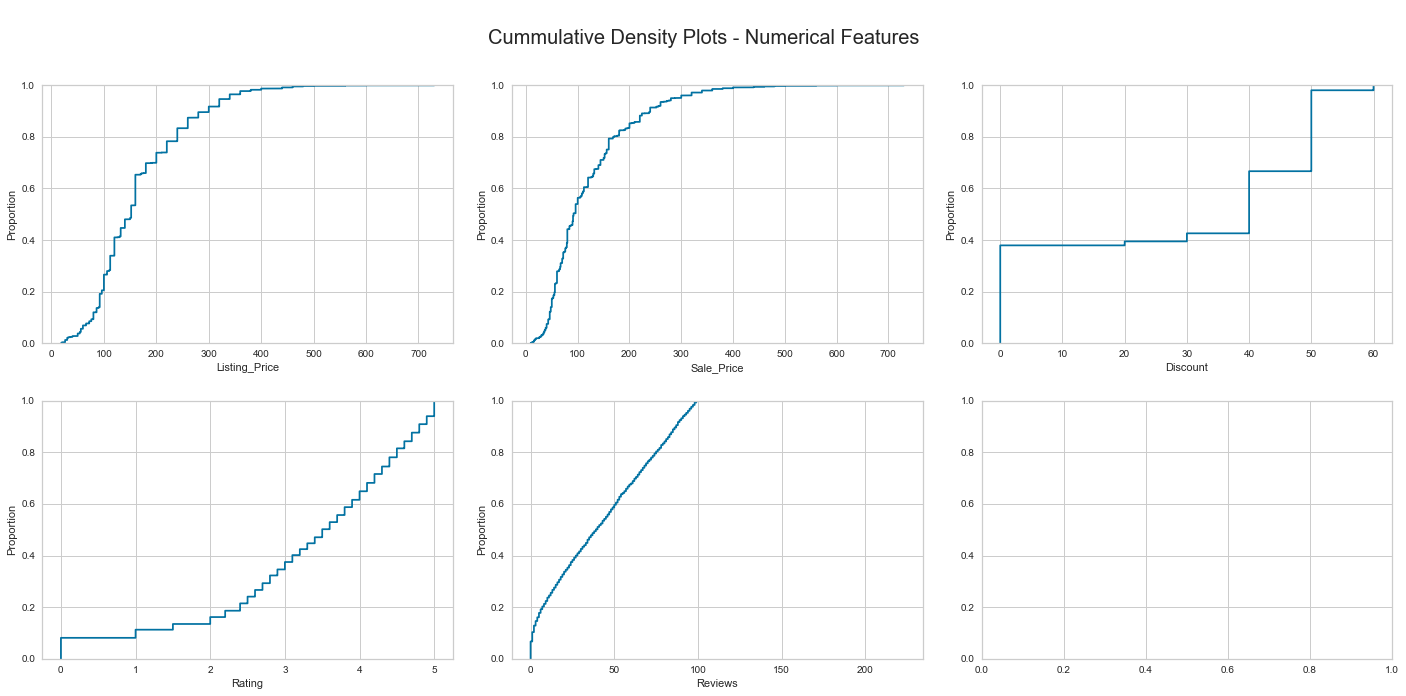

In [16]:
num_features = ['Listing_Price','Sale_Price', 'Discount', 'Rating', 'Reviews']

fig, axes = plt.subplots(2, 3,  figsize=(20, 10))
fig.suptitle('\nCummulative Density Plots - Numerical Features', fontsize=20)

counter = 0
for ii in range(2):
    for jj in range(3):
        if counter <5:
            sns.ecdfplot(ax=axes[ii, jj], data=df, x=num_features[counter])
        counter = counter+1

fig.tight_layout(pad=2.0)

**Listing_Price**
- Only 20% of all shoes are priced below \\$100 on the lower end 
- Approx. 10% of all shoes are priced between \\$300 & upto > \\$700 on the higher end

**Discount**
- 40% of shoes have 0% discount on the lower end & likewise 40% shoes have a discount between 50-60% on the higher end of discount!
- ~<20% of shoes have discounts between 40 & 50% 

**Sale_Price**
- Cummulative Density Plot for Sale_Price has the same overall shape as that for Listing_Price, however, the plot for Sale_Price seems to be shifted slightly to the left in comparison. This is expected as the discount applied to the Listing_Price would decrease the corresponding Sale_Price

**Rating**
- Only <20% ratings are less than rating of  '2' on a rating sclae upto '5'
- Over 40% ratings are for rating between '4' & '5' indicating shoes are rated well by customers 

**Reviews**
- Over 40% of all shoes have between 50-100+ reviews

#### (2) Product_Name

In [17]:
len(df['Product_Name'].unique())

1531

- There are 1531 unique product names in the dataset & it'll be difficult to visualize all of them at once

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",\
                       order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()                                  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()                 # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
                                           # annotate the percentage
    plt.show()                             # show the plot

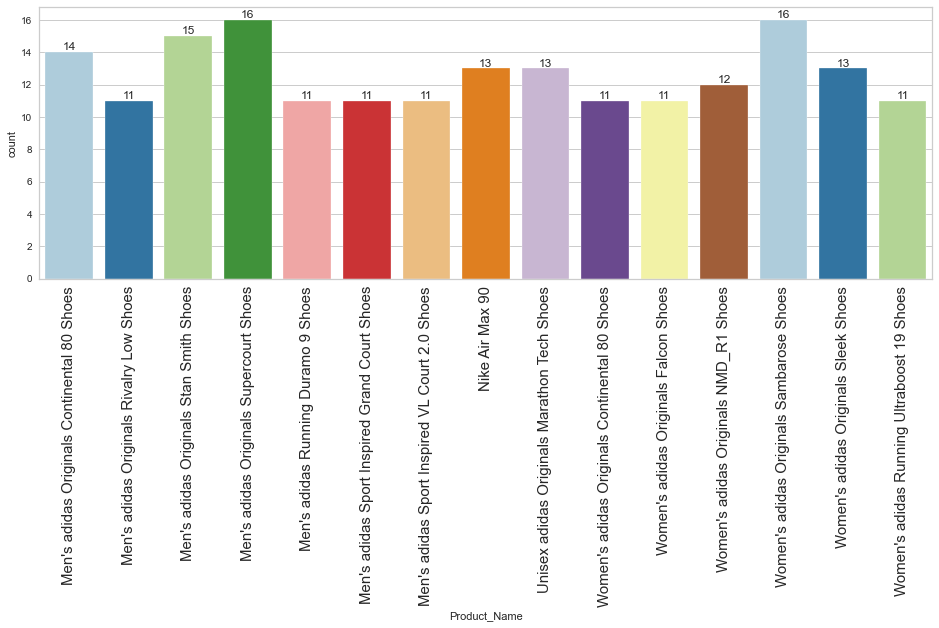

In [19]:
# Visualising top 15 Product_Name (by count)
labeled_barplot(df, 'Product_Name', n=15)

- All of the product names except one contain Adidas in Product_Name in the top 15 products by count
- Most frequent product is either 'Men's Adidas Originals Supercourt Shoes' or 'Women's Adidas Originals Sambarose Shoes', both with a count # 16
- 'Nike Air Max 90' has a count # 13 

In [20]:
# Check number of unique products for both Adidas & Nike
len(df[df['Product_Name'].str.lower().str.contains('adidas')]['Product_Name'].unique())

973

- There are 973 different Adidas Product_Name in the dataset

In [21]:
len(df[df['Product_Name'].str.lower().str.contains('nike')]['Product_Name'].unique())

327

- There are only 327 different Nike Product_Name in the dataset


- These (973 + 327) add up only to 1300, there are 231 product names which neither contain addidas or nike

In [22]:
df[(~df['Product_Name'].str.lower().str.contains('nike')) & \
   (~df['Product_Name'].str.lower().str.contains('adidas'))]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews
48,Women's Sport Inspired Yking 2.0 Shoes,66,40,40,Adidas CORE / NEO,These lightweight running-inspired shoes for w...,2.0,11
136,Women's Originals Sleek Super Shoes,160,112,30,Adidas ORIGINALS,These patent leather adidas Sleek Super Shoes ...,2.2,96
191,Women's Originals Continental 80 Shoes,180,108,40,Adidas ORIGINALS,"Part of the Out Loud collection, these shoes m...",4.4,81
227,Men's Outdoor Ediffin II Sandals,60,60,0,Adidas SPORT PERFORMANCE,A light yet well covered sandal with an intere...,3.4,91
263,Men's Running Nova Flow Shoes,120,120,0,Adidas CORE / NEO,Cushion your every step in lightweight comfort...,2.4,6
...,...,...,...,...,...,...,...,...
3162,Air Jordan 7 Retro,320,224,0,Nike,The Air Jordan 7 Retro celebrates MJ's champio...,4.8,4
3176,Jordan Air Latitude 720,320,256,0,Nike,"Boasting a bold 720 Air unit, the Jordan Air L...",5.0,1
3253,Air Jordan 1 Jester XX Low Laced SE,180,144,0,Nike,"Lighten up, have some fun, and sweat nothing e...",0.0,0
3257,Air Jordan 5 Retro,320,320,0,Nike,The Air Jordan 5 Retro for women gives a colou...,3.3,3


In [23]:
len(df[(~df['Product_Name'].str.lower().str.contains('nike')) & \
       (~df['Product_Name'].str.lower().str.contains('adidas'))]['Product_Name'].unique())

231

- The Product_Name without 'Adidas' or 'Nike' in Product_Name appear to belong to both Adidas & Nike brands 

#### (3) Brand

In [24]:
len(df['Brand'].unique())

5

- There are 5 different brands 

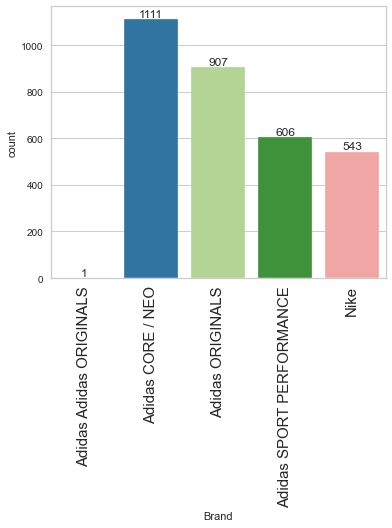

In [25]:
# Visualising Brand (by count)
labeled_barplot(df, 'Brand')

- There are 4 different Adidas Brands : Adidas Originals, CORE/NEO, Originals & Sport Performance
- Adidas Originals will be renamed Originals to create a homogenoeus sub group 
- All Nike products are under brand Nike with no further differentiation 


- The database has over 5 times as many Adidas shoes than of brand Nike (unbalanced data)

In [26]:
df.loc[df.Brand=='Adidas Adidas ORIGINALS', 'Brand'] = 'Adidas ORIGINALS'

#### (4) Bivariate Analysis - Correlation Heatmap

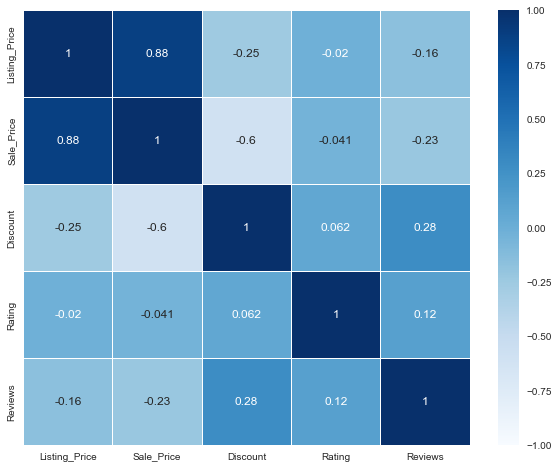

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=+1, cmap='Blues', cbar=True);        

- Listing_Price is positively correlated (0.88) with Sale Price
- Sale_Price is negatively correlated (-0.6) with Discount
- Rating & Reviews do not show any strong positive or negative linear correlation with Sale_Price or Discount

#### (5) Listing_Price

In [28]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  # Number of rows of the subplot grid= 2
                                    sharex=True,     # x-axis will be shared among all subplots
                                    gridspec_kw={"height_ratios": (0.25, 0.75)},
                                    figsize=figsize,)  
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  
    # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins \
    else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  
    # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-") # Add median to the histogram

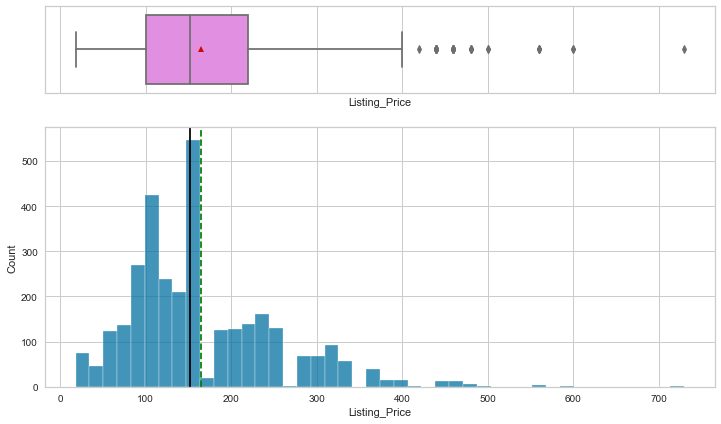

In [29]:
histogram_boxplot(df, 'Listing_Price')

- The distribution is right skewed with a few outliers > \\$400

#### (6) Sale_Price

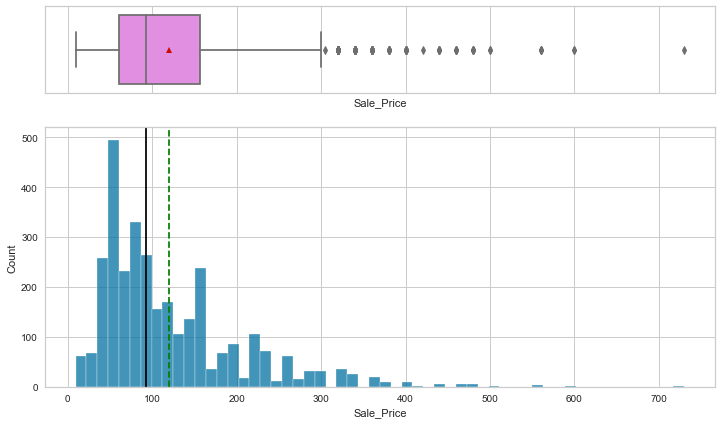

In [30]:
histogram_boxplot(df, 'Sale_Price')

- The distribution is right skewed with outliers > \\$300

#### (7) Discount 

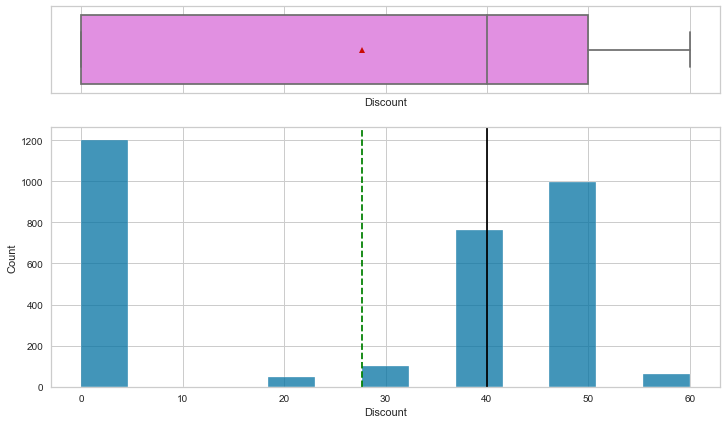

In [31]:
histogram_boxplot(df, 'Discount')

- Distribution is left skewed
- Majority of discounts are for 0% followed by 50%. Discounts do not exceed > 60%
- No outliers

#### (8) Rating

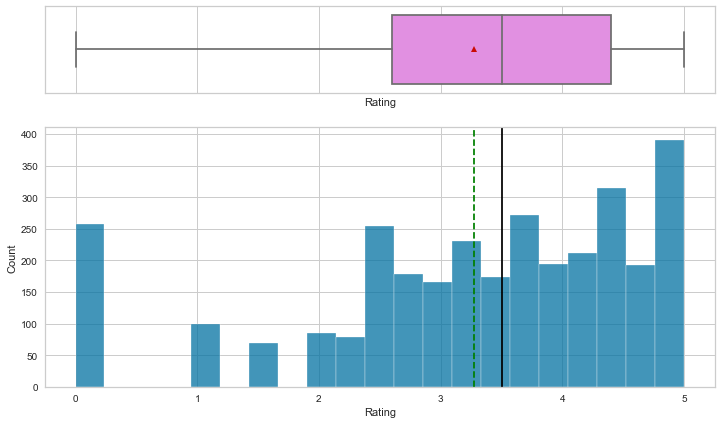

In [32]:
histogram_boxplot(df, 'Rating')

- Distribution is left skewed
- Frequency count is however highest for Rating of '5'
- No outliers

#### (9) Reviews

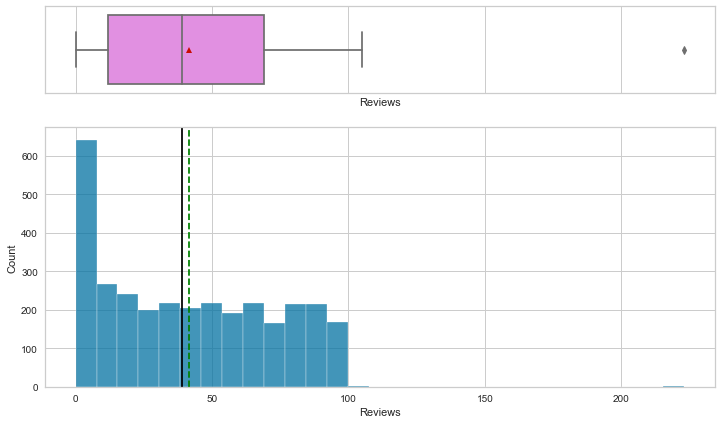

In [33]:
histogram_boxplot(df, 'Reviews')

- Distribution is right skewed
- Frequency count is however highest for review count between 0-10
- No outliers

#### (10) Bivariate Analysis - Pairplot 

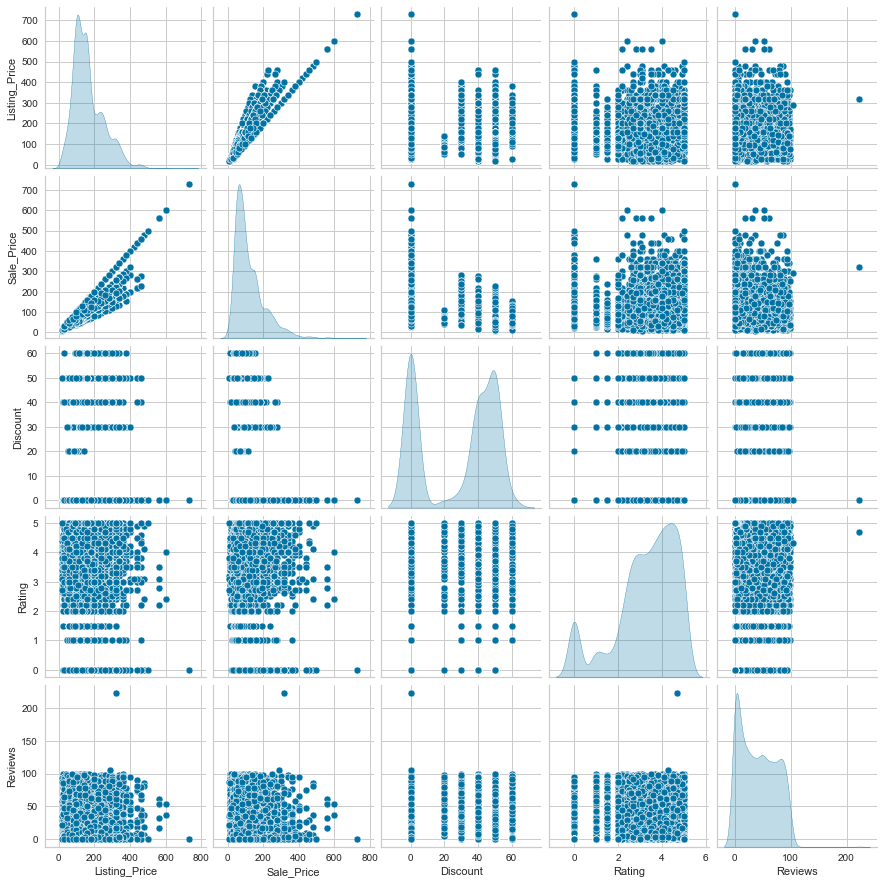

In [34]:
sns.pairplot(df,diag_kind="kde");

- Listing_Price appears to have 5 peaks, Sale_Price 4 peaks, Discount 3 peaks, Rating 4 peaks & Reviews 3 peaks

#### (11) Text Analytics
#### Description

In [35]:
df.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,300,150,50,Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41
1,Women's adidas Originals Sleek Shoes,152,76,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24
2,Women's adidas Swim Puka Slippers,20,12,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,140,70,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35
4,Women's adidas Originals Taekwondo Shoes,160,80,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72


In [36]:
# Converting text to lowercase
df['Description'] = df['Description'].str.lower()
df['Description']

0       channeling the streamlined look of an '80s rac...
1       a modern take on adidas sport heritage, tailor...
2       these adidas puka slippers for women's come wi...
3       inspired by modern tech runners, these women's...
4       this design is inspired by vintage taekwondo s...
                              ...                        
3260    the nike tiempo legend 8 academy tf takes the ...
3262    the nike react metcon amp takes the stability ...
3263    the air jordan 8 retro recaptures the memorabl...
3266    the nike air max 98 features the og design lin...
3267    a mash-up of pegasus' past, the nike p-6000 se...
Name: Description, Length: 3168, dtype: object

- Description has been converted to lower case 

In [37]:
# Removing non-alphanumeric characters
import re
def remove_non_alphanumeric(text):
    pattern = re.compile('\W')
    x = re.sub(pattern, ' ', text)
    return(x)
    
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].apply(remove_non_alphanumeric)

df['Description']

0       channeling the streamlined look of an  80s rac...
1       a modern take on adidas sport heritage  tailor...
2       these adidas puka slippers for women s come wi...
3       inspired by modern tech runners  these women s...
4       this design is inspired by vintage taekwondo s...
                              ...                        
3260    the nike tiempo legend 8 academy tf takes the ...
3262    the nike react metcon amp takes the stability ...
3263    the air jordan 8 retro recaptures the memorabl...
3266    the nike air max 98 features the og design lin...
3267    a mash up of pegasus  past  the nike p 6000 se...
Name: Description, Length: 3168, dtype: object

- Non-alphanumeric characters like ',' or ''' or '-' have been removed 

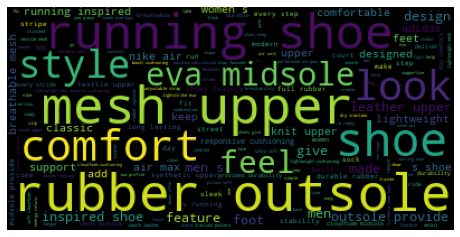

In [38]:
# Word cloud visualisation 
df['Description'].to_csv('Description.csv')  
text = open('Description.csv').read()

from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- rubber, outsole, shoe, comfort, mesh, running, look, feel are some of the common word occurrences across product description 

In [39]:
# Tokenization
df['Description'] = df['Description'].apply(nltk.word_tokenize)
df['Description'] 

0       [channeling, the, streamlined, look, of, an, 8...
1       [a, modern, take, on, adidas, sport, heritage,...
2       [these, adidas, puka, slippers, for, women, s,...
3       [inspired, by, modern, tech, runners, these, w...
4       [this, design, is, inspired, by, vintage, taek...
                              ...                        
3260    [the, nike, tiempo, legend, 8, academy, tf, ta...
3262    [the, nike, react, metcon, amp, takes, the, st...
3263    [the, air, jordan, 8, retro, recaptures, the, ...
3266    [the, nike, air, max, 98, features, the, og, d...
3267    [a, mash, up, of, pegasus, past, the, nike, p,...
Name: Description, Length: 3168, dtype: object

In [40]:
# Lemmetization
lem = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: [lem.lemmatize(word) for word in x])
df['Description']

0       [channeling, the, streamlined, look, of, an, 8...
1       [a, modern, take, on, adidas, sport, heritage,...
2       [these, adidas, puka, slipper, for, woman, s, ...
3       [inspired, by, modern, tech, runner, these, wo...
4       [this, design, is, inspired, by, vintage, taek...
                              ...                        
3260    [the, nike, tiempo, legend, 8, academy, tf, ta...
3262    [the, nike, react, metcon, amp, take, the, sta...
3263    [the, air, jordan, 8, retro, recapture, the, m...
3266    [the, nike, air, max, 98, feature, the, og, de...
3267    [a, mash, up, of, pegasus, past, the, nike, p,...
Name: Description, Length: 3168, dtype: object

- Slippers, runners, recaptures, features etc. have all been broken down into their root slipper, runner, recapture, feature etc.

In [41]:
# Stemming
stem = PorterStemmer()
df['Description'] = df['Description'].apply(lambda x: [stem.stem(word) for word in x])
df['Description']

0       [channel, the, streamlin, look, of, an, 80, ra...
1       [a, modern, take, on, adida, sport, heritag, t...
2       [these, adida, puka, slipper, for, woman, s, c...
3       [inspir, by, modern, tech, runner, these, woma...
4       [thi, design, is, inspir, by, vintag, taekwond...
                              ...                        
3260    [the, nike, tiempo, legend, 8, academi, tf, ta...
3262    [the, nike, react, metcon, amp, take, the, sta...
3263    [the, air, jordan, 8, retro, recaptur, the, me...
3266    [the, nike, air, max, 98, featur, the, og, des...
3267    [a, mash, up, of, pegasu, past, the, nike, p, ...
Name: Description, Length: 3168, dtype: object

- Channeling, streamlining, etc. have all been broken down into their root channel, streamlin etc.

In [42]:
df['Description'] = df['Description'].str.join(' ')

In [43]:
df.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,300,150,50,Adidas ORIGINALS,channel the streamlin look of an 80 racer thes...,4.8,41
1,Women's adidas Originals Sleek Shoes,152,76,50,Adidas ORIGINALS,a modern take on adida sport heritag tailor ju...,3.3,24
2,Women's adidas Swim Puka Slippers,20,12,40,Adidas CORE / NEO,these adida puka slipper for woman s come with...,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,140,70,50,Adidas CORE / NEO,inspir by modern tech runner these woman s sho...,4.1,35
4,Women's adidas Originals Taekwondo Shoes,160,80,50,Adidas ORIGINALS,thi design is inspir by vintag taekwondo style...,3.5,72


#### (12) Multivariate Analysis

#### Q. How does the Sale_Price vary by Brand (& Discount)? 

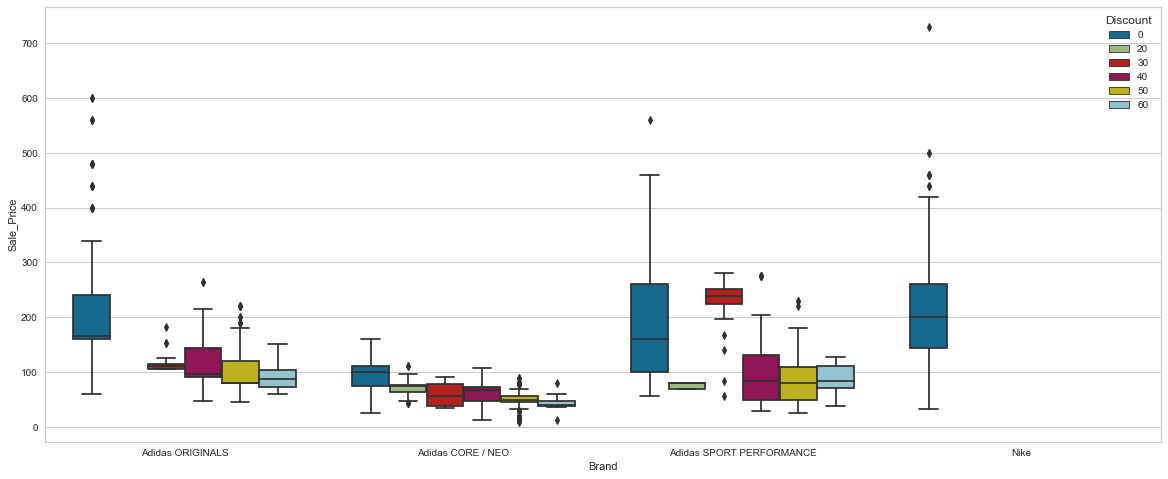

In [44]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Brand', y='Sale_Price', hue='Discount');

- Nike branded shoes in the dataset do not offer any discounts (other than 0%)
- High end Adidas ORIGINALS i.e., > \\$350 Sale_Price offer 0% Discounts
- Adidas CORE/NEO shoes typically have lower Sale_Price than ORIGINALS or SPORT PERFORMANCE irrespective of Discount % offered 
- Adidas shoes with 30% Discounts have the maximum Sale_Price in SPORT PERFORMANCE category

#### Q. How do the brands differ w.r.t rating & reviews?

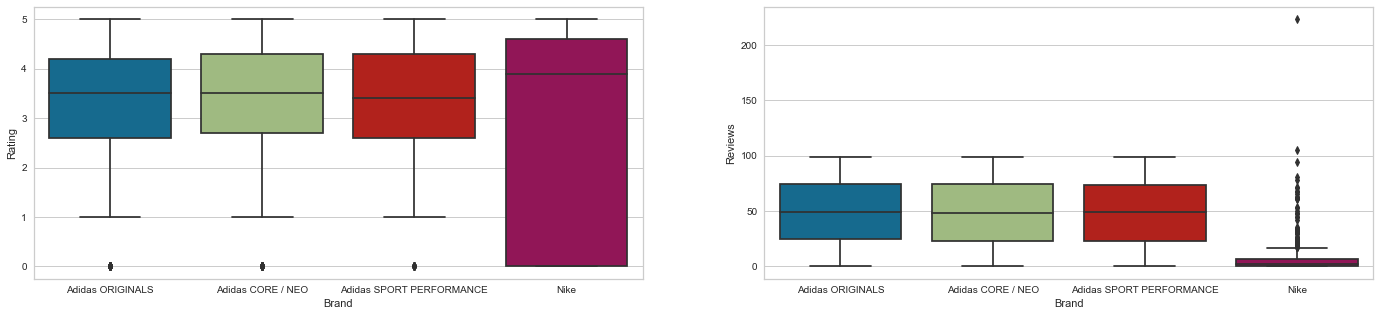

In [45]:
fig, axs = plt.subplots(1,2, figsize=(24,5))
sns.boxplot(data=df, x='Brand', y='Rating', ax=axs[0]);
sns.boxplot(data=df, x='Brand', y='Reviews', ax=axs[1]);

**Rating**
- All Adidas brands have ratings typically between 1 & 5 with a couple of outliers on the lower end of rating 0
- Nike branded shoes have ratings between 0 & 5 with no outliers 
- The median rating of Nike Branded shoes is closer to 4, higher than any of the Adidas brands at 3.5

**Reviews**
- Nike branded shoes have reviews typically on the scale of 0 to < 25 with several outliers having reviews > 25
- Nike has an outlier exceeding 200 reviews 
- All Adidas branded shoes have reviews typically between 0-100 with no outliers 

#### Q. How many shoes in each brand? How many shoes in each brand with 0% discount?

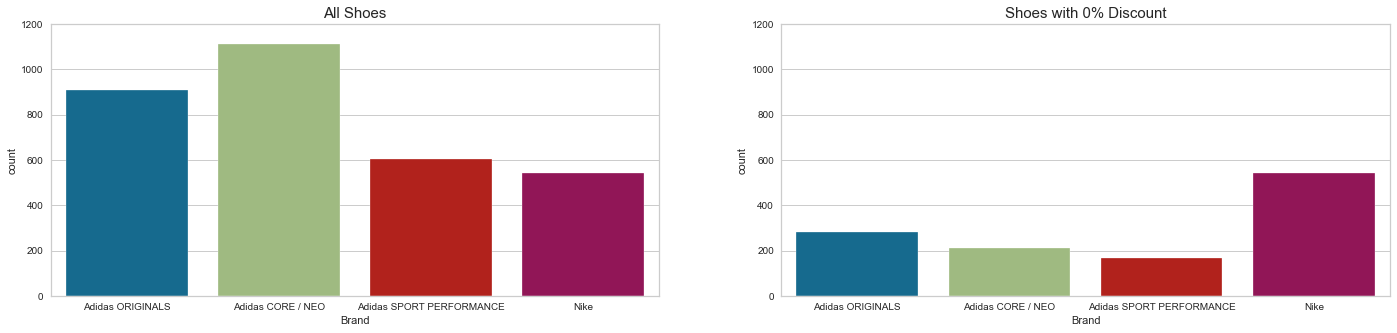

In [46]:
fig, axs = plt.subplots(1,2, figsize=(24,5))

axs[0].set_ylim([0, 1200])
axs[0].set_title("All Shoes", size=15)
sns.countplot(data=df, x='Brand', ax=axs[0]);

axs[1].set_ylim([0, 1200])
axs[1].set_title("Shoes with 0% Discount", size=15)
sns.countplot(data=df[df['Discount']==0], x='Brand', ax=axs[1]);

**All Shoes**
- Adidas CORE/NEO has the highest number of shoes i.e., > 1000 but also contains shoes with some of lowest Sale_Price (as seen in plots above)
- Adidas ORIGINALS has > 800 shoes, SPORTS PERFORMANCE ~ 600 shoes while Nike has < 600 shoes

**Shoes with 0% Discount**
- As seen in the plots above, all of Nike shoes have 0% discount. Nike has the maximum shoes across brands with 0% discount
- Adidas shoes with 0% discounts are maximum for ORIGINALS > 200, then CORE/NEO ~200 & finally SPORT PERFORMANCE < 200

### Product Clustering - K Means

#### Data Preprocessing

- Only numerical features need to be considered 
- Since clustering is based on distance, scaling/ normalization is a necessary pre-requisite

In [47]:
# Scaling the numerical features 
df_subset        = df[['Listing_Price','Sale_Price','Discount','Rating','Reviews']]

sc = StandardScaler()
df_subset_scaled = pd.DataFrame(sc.fit_transform(df_subset), columns=df_subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0917100999350846
Number of Clusters: 2 	Average Distortion: 1.7095951376493999
Number of Clusters: 3 	Average Distortion: 1.5533025094021662
Number of Clusters: 4 	Average Distortion: 1.438824739808191
Number of Clusters: 5 	Average Distortion: 1.3021951376779963
Number of Clusters: 6 	Average Distortion: 1.224604153108943
Number of Clusters: 7 	Average Distortion: 1.158044252586061


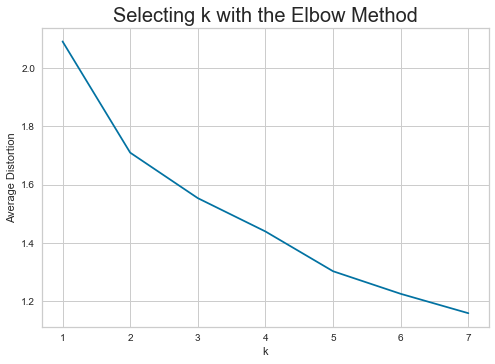

In [48]:
# Trying upto 7 cluster groups - Elbow method
clusters=range(1,8)
meanDistortions=[]

# Plot the mean distortion for cluster groups between 1 & 7
for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model.fit(df_subset_scaled)
    prediction=model.predict(df_subset_scaled)
    distortion=sum(np.min(cdist(df_subset_scaled, model.cluster_centers_, 'euclidean'), axis=1))/df_subset_scaled.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)
plt.plot(clusters, meanDistortions, 'bx-');

- Either 3, 4 or 5 cluster groups may be accurate

In [49]:
# Trying upto 7 cluster groups - silhoutte score
clusters=range(2,8)
sil_score = []

for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model.fit(df_subset_scaled)
    prediction=model.predict(df_subset_scaled)
    score = silhouette_score(df_subset_scaled, prediction)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.33623375374271514)
For n_clusters = 3, silhouette score is 0.2933363028395692)
For n_clusters = 4, silhouette score is 0.3083117839849185)
For n_clusters = 5, silhouette score is 0.2721877361319608)
For n_clusters = 6, silhouette score is 0.28282520932972977)
For n_clusters = 7, silhouette score is 0.2925229351900083)


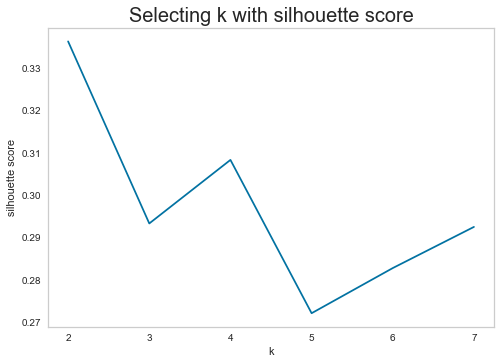

In [50]:
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score', fontsize=20)
plt.plot(clusters,sil_score)
plt.grid()

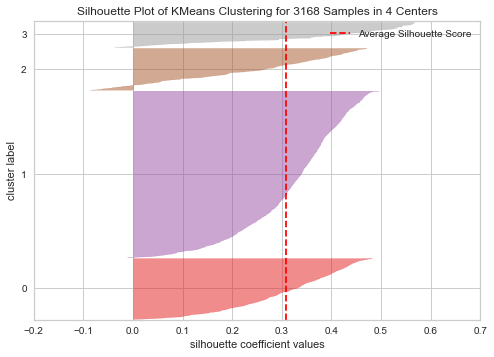

In [51]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(df_subset_scaled)    
visualizer.show();

- silhouette score is highest for 4 clusters

#### Choosing n_clusters = 4

In [52]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_subset_scaled)

KMeans(n_clusters=4, random_state=1)

In [53]:
df['K_means_segments'] = kmeans.labels_
df_subset_scaled['K_means_segments'] = kmeans.labels_

In [54]:
cluster_profile = df.groupby('K_means_segments').mean()

In [55]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Product_Name'].count().values

In [56]:
cluster_profile

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,130.283969,123.534351,1.007634,3.776794,38.766412,655
1,136.341518,73.942522,45.446429,3.382366,50.071987,1792
2,311.244444,268.584444,8.711111,3.931778,31.586667,450
3,198.693727,172.763838,6.678967,0.202583,9.874539,271


- There are 655, 1792, 450 & 271 shoes in the 4 different cluster groups 0, 1, 2 and 3

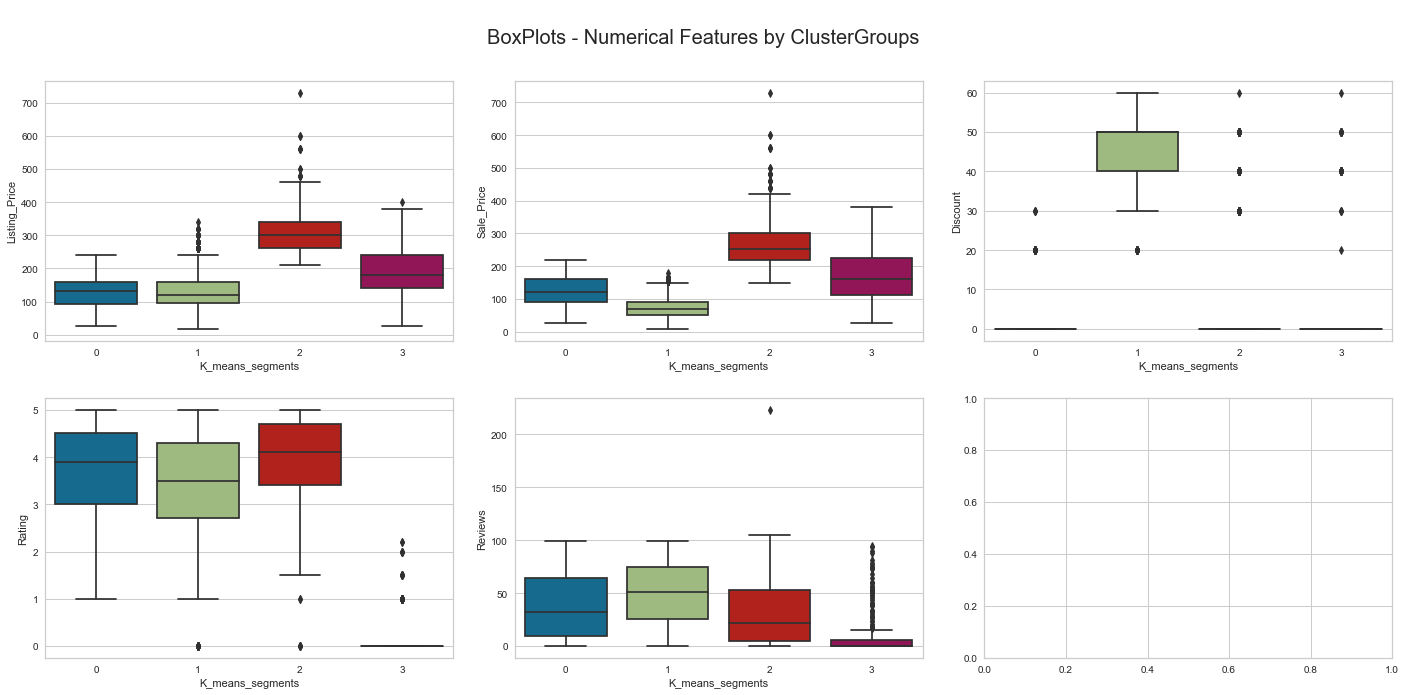

In [57]:
fig,axes= plt.subplots(2, 3,  figsize=(20, 10))
fig.suptitle('\nBoxPlots - Numerical Features by ClusterGroups', fontsize=20)

num_cols= ['Listing_Price','Sale_Price','Discount','Rating','Reviews']

counter = 0
for ii in range(2):
    for jj in range(3):
        if counter <5:
            sns.boxplot(ax=axes[ii, jj],y=df[num_cols[counter]],x=df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

- Clusters 0, 2, 3 have average Discount values very close to \\$0 while cluster 1 has the average Discount close to 50%


- Cluster 0 & 1 both have average Listing_Price as ~\\$130. However, as discussed, average Discounts for the two clusters are 0% & 50% respectively, therefore Sale_Price is similar to Listing_Price for Cluster0 but much lower for Cluster1
- Cluster 2 & 3 are more premium products with average Listing_Price at \\$300 & \\$200 respectively


- Cluster 3 further clearly stands out with an average rating of ~0 while other clusters have rating ~3.5. As well Cluster 3 has the lowest average number of reviews 


- Cluster 2 is the premium product category with the highest average Listing_Price & Sale_Price despite low Discounts. It enjoys the highest average Rating & does not fare too badly for average number of reviews 

In [58]:
# Comparing cluster vs. Brand 
pd.crosstab(df.Brand, df.K_means_segments).style.highlight_max(color = 'lightgreen', axis = 0)

K_means_segments,0,1,2,3
Brand,,,,
Adidas CORE / NEO,230,866,0,15
Adidas ORIGINALS,159,568,132,49
Adidas SPORT PERFORMANCE,100,358,128,20
Nike,166,0,190,187


- Nike dominates clusters 2 & 3 while Adidas CORE/NEO dominates clusters 0 & 1

#### Dimensionality Reduction using PCA for visualization

In [59]:
# PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df_subset_scaled)
reduced_df_pca = pd.DataFrame(data=X_reduced_pca, columns=["Component 1", "Component 2"])

In [60]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.6471124366488413

- The 2 dimensions are able to explain over 64% of the variance in the data

#### Scatterplot by cluster labels - K-Means Clustering

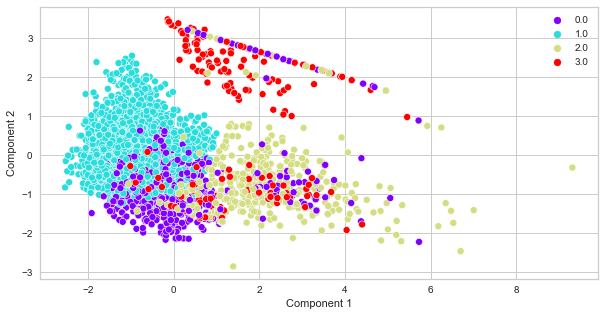

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=reduced_df_pca,x="Component 1",y="Component 2",hue=df["K_means_segments"],palette="rainbow",)
plt.legend(bbox_to_anchor=(1, 1));

- There are some overlap within clusters..

In [62]:
# Products in each segment

for cl in df["K_means_segments"].unique():
    print("The",
        df[df["K_means_segments"] == cl]["Product_Name"].nunique(),
        "Product_Name in cluster",cl,"are:",)
    print(df[df["K_means_segments"] == cl]["Product_Name"].unique())
    print("-" * 100, "\n")

The 789 Product_Name in cluster 1 are:
["Women's adidas Originals NMD_Racer Primeknit Shoes"
 "Women's adidas Originals Sleek Shoes"
 "Women's adidas Swim Puka Slippers"
 "Women's adidas Sport Inspired Questar Ride Shoes"
 "Women's adidas Originals Taekwondo Shoes"
 "Women's adidas Sport Inspired Duramo Lite 2.0 Shoes"
 "WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES"
 "Men's adidas Originals Forest Grove Shoes"
 "Women's adidas Originals Swift Run Shoes"
 "Women's adidas Originals Continental Vulc Shoes"
 "Women's adidas Running Duramo 9 Shoes"
 "Women's adidas Originals Supercourt Shoes"
 "Men's adidas Sport Inspired Response Trail Shoes"
 "Women's adidas Running Cosmic 2 Shoes"
 "Women's adidas Sport Inspired Storm Runner Shoes"
 "Women's adidas Sport Inspired Quickspike Shoes"
 "WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS"
 "Women's adidas Sport Inspired Lite Racer Shoes"
 "Women's adidas Sport Inspired Arcadeis Shoes"
 "Women's adidas Sport Inspired Videll Shoes"
 "Women's adidas Running Ener

### Insights & Business Recommendations

- Cluster 1 (dominated by Adidas CORE/NEO, followed by Adidas ORIGINALS & then SPORT PERFORMANCE) is a lower end-mid segment category which typically has a 30-60% discount applied to the Listing_Price. Hence, this segment can be promoted specifically during holidays & year end sales 


- Cluster 3 (dominated predominantly by Nike) is a mid-high end segment category which has a high Listing_Price & no Discounts & performs poorly in terms of Rating & Number of Reviews. This category requires further marketing efforts to gather customer feedback for improvement 


- Cluster 2 (dominated by Nike, followed by Adidas Sports Performance & Originals) is a premium segment category which enjoys a high Listing_Price & no Discounts but performs well in terms of Rating & Number of Reviews. Nike needs to focus on selling more of the Product_Name(s) in this cluster than previous cluster3. Likewise, Adidas can focus more on category specific customer marketing to attract premium customers of this segment


- Cluster 0 (dominated by Adidas CORE/NEO) has shoes belonging to all brands. These are lower end-mid segment category with typically no discounts. These can be targeted for general public throughout the year (including normal days of no promotions)

### Product Classification

In [63]:
X = df[['Listing_Price','Sale_Price','Discount','Brand','Rating','Reviews']]
y = df['K_means_segments']

In [64]:
# Split data into train_full & test sets. Use stratify to maintain class imbalance across both sets

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y,\
                                                              shuffle=True)

#### Considerations

- One hot encoding of categorical columns such as 'Brand'
- Scaling/Normalization of numerical columns such as 'Listing_Price', 'Sale_Price', 'Discount', 'Rating' & 'Reviews'
- Handling class imbalance as the 4 target classes have verying number of train records 

In [65]:
cat_columns = ['Brand']
num_columns = ['Listing_Price','Sale_Price','Discount','Rating','Reviews']

categorical_transformer = OneHotEncoder()
numerical_transformer   = StandardScaler()

preprocessor            = ColumnTransformer(transformers=[
                          ('cat', categorical_transformer, cat_columns),
                          ('num', numerical_transformer,   num_columns)])

#### Model Evaluation Criteria

- We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting all the classes correctly

#### 5-fold Cross Validation

In [66]:
estimators =[
    ("LogisticRegression", LogisticRegression(random_state=1)),     \
    ('DecisionTree',       DecisionTreeClassifier(random_state=1)), \
    ("BaggingClassifier",  BaggingClassifier(random_state=1))
]

final_estimator = LogisticRegression(random_state=1)


models     =[
    ('Logistic_Regression', LogisticRegression(random_state=1)),
    ('Decision_Tree',       DecisionTreeClassifier(random_state=1)),
    ('Random_Forest',       RandomForestClassifier(random_state=1)),
    ('Bagging_Classifier',  BaggingClassifier(random_state=1)),
    ('Gradient_Boost',      GradientBoostingClassifier(random_state=1)),
    ('XG_Boost',            XGBClassifier(random_state=1, eval_metric='mlogloss')),
    ('Stacking_Classifier', StackingClassifier(estimators=estimators, final_estimator=final_estimator))
] 

In [67]:
results = {}

for name, model in models:
    
    my_pipeline = Pipeline(
                        [('preprocessor', preprocessor),
                         ('Sampling'    , RandomOverSampler(random_state=1)),
                         ('model'       , model)])
        
    score      = cross_validate(my_pipeline, X_train_full, y_train_full, scoring=['accuracy','f1_macro'],\
                                 cv=5)  
    
    result     = pd.DataFrame.from_dict(score).mean(axis=0)
    
    results[name] = result

In [68]:
performance_df = pd.DataFrame.from_dict(results)
performance_df

,Logistic_Regression,Decision_Tree,Random_Forest,Bagging_Classifier,Gradient_Boost,XG_Boost,Stacking_Classifier
fit_time,0.145284,0.015299,0.295905,0.068208,2.076280,1.098745,1.184293
score_time,0.006723,0.005449,0.019929,0.007612,0.011231,0.013194,0.009022
test_accuracy,0.988552,0.972769,0.978295,0.977898,0.979475,0.981056,0.980660
test_f1_macro,0.984635,0.957866,0.965310,0.965873,0.969755,0.972485,0.970394


- All models (even with default parameters) have great performance. This is expected as the targets determined by K-Means are based on the feature space
- Logistic Regression has the best baseline performance amongst models followed by XGBoost

#### Neural Network

In [69]:
# Hold out cross validation - split the training set into train & validation sets

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, \
                                                      random_state=1, stratify=y_train_full, shuffle=True)

# Checking the performance with a neural network with default parameters
model = Sequential()
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',  \
              metrics=['accuracy'])

2022-04-16 10:40:26.650356: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [70]:
# Data Preprocessing

# one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)

# normalizing the data
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.fit_transform(X_valid)

# handling data imbalance
ros     = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [71]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
144/144 [==============================] - 1s 3ms/step - loss: 1.4158 - accuracy: 0.7016 - val_loss: 1.0806 - val_accuracy: 0.8994
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.9498 - val_loss: 0.4704 - val_accuracy: 0.9744
Epoch 3/20
144/144 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.9791 - val_loss: 0.2673 - val_accuracy: 0.9803
Epoch 4/20
144/144 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9830 - val_loss: 0.1847 - val_accuracy: 0.9763
Epoch 5/20
144/144 [==============================] - 1s 4ms/step - loss: 0.1504 - accuracy: 0.9865 - val_loss: 0.1438 - val_accuracy: 0.9783
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 0.1233 - accuracy: 0.9865 - val_loss: 0.1190 - val_accuracy: 0.9822
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9897 - val_loss: 0.1063 - val_accuracy: 0.9803
Epoch 

<Figure size 720x360 with 0 Axes>

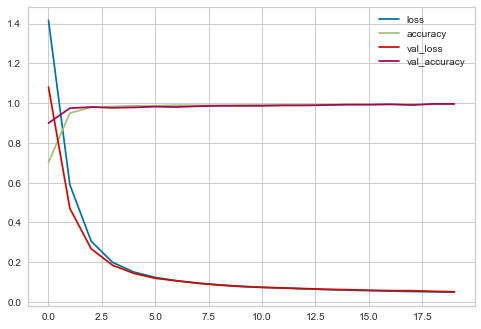

In [72]:
plt.figure(figsize=(10,5))
pd.DataFrame(history.history).plot();

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 200)               1800      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 44,010
Trainable params: 44,010
Non-trainable params: 0
_________________________________________________________________


- The neural network is able to achieve an accuracy of upto 0.9961!

#### Hyperparameter Tuning - GridSearchCV - Logistic Regression

In [74]:
my_pipeline = Pipeline(
                    [('preprocessor',       preprocessor),
                     ('Sampling'    ,       RandomOverSampler(random_state=1)),
                     ('Logistic_Regression',LogisticRegression(random_state=1))])

parameters = {
              'Logistic_Regression__penalty' : ['l1','l2','elasticnet'],
              'Logistic_Regression__C'       : [0.01, 0.25, 0.50, 0.75, 1, 1.25, 1.50],
              'Logistic_Regression__solver'  : ['newton-cg','lbfgs','liblinear'], 
            }

gs_lr      = GridSearchCV(my_pipeline,parameters,scoring='f1_macro',cv=5,n_jobs=-1)

In [75]:
gs_lr.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Brand']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Listing_Price',
                                                                          'Sale_Price',
                                                                          'Discount',
                                                                          'Rating',
                                                                          'Reviews'])])),
                                       ('Sampling',
        

In [76]:
gs_lr.best_params_

{'Logistic_Regression__C': 1.5,
 'Logistic_Regression__penalty': 'l2',
 'Logistic_Regression__solver': 'newton-cg'}

In [77]:
gs_lr.best_score_

0.9852613688916355

- Hyperparameter tuning for Logistic Regression has resulted in marginal improvements in the model performances

#### Checking the performance on the Testing dataset

In [78]:
gs_lr_tuned = gs_lr.best_estimator_
gs_lr_tuned.fit(X_train_full, y_train_full)

pred = gs_lr_tuned.predict(X_test)

print('Logistic Regression Unbiased Testing Performance:\n')
print(classification_report(y_test, pred, digits=6))

Logistic Regression Unbiased Testing Performance:

              precision    recall  f1-score   support

           0   0.984733  0.984733  0.984733       131
           1   1.000000  0.986072  0.992987       359
           2   0.967742  1.000000  0.983607        90
           3   0.964286  1.000000  0.981818        54

    accuracy                       0.988959       634
   macro avg   0.979190  0.992701  0.985786       634
weighted avg   0.989224  0.988959  0.988999       634



#### Hyperparameter Tuning - GridSearchCV - XGBoost

In [79]:
my_pipeline = Pipeline(
                    [('preprocessor',  preprocessor),
                     ('Sampling'    ,  RandomOverSampler(random_state=1)),
                     ('XGBoost'     ,  XGBClassifier(random_state=1, eval_metric='mlogloss', use_label_encoder=False ))])

parameters = {'XGBoost__n_estimators'     : [10, 30, 50, 70],
              'XGBoost__subsample'        : [0.4,0.7, 1],
              'XGBoost__colsample_bytree' : [0.7, 0.9,1],
              'XGBoost__colsample_bylevel': [0.5,0.7,1],
              'XGBoost__learning_rate'    : [0.1,0.2]}

gs_xgb     = GridSearchCV(my_pipeline,parameters,scoring='f1_macro',cv=5,n_jobs=-1)

In [80]:
gs_xgb.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Brand']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Listing_Price',
                                                                          'Sale_Price',
                                                                          'Discount',
                                                                          'Rating',
                                                                          'Reviews'])])),
                                       ('Sampling',
        

In [81]:
gs_xgb.best_params_

{'XGBoost__colsample_bylevel': 0.7,
 'XGBoost__colsample_bytree': 1,
 'XGBoost__learning_rate': 0.2,
 'XGBoost__n_estimators': 70,
 'XGBoost__subsample': 0.4}

In [82]:
gs_xgb.best_score_

0.9790597816050622

- Hyperparameter tuning for XGBoost has resulted in marginal improvements in the model performances

#### Checking the performance on the Testing dataset

In [83]:
gs_xgb_tuned = gs_xgb.best_estimator_
gs_xgb_tuned.fit(X_train_full, y_train_full)

pred = gs_xgb_tuned.predict(X_test)

print('XGBoost Unbiased Testing Performance:\n')
print(classification_report(y_test, pred, digits=6))

XGBoost Unbiased Testing Performance:

              precision    recall  f1-score   support

           0   0.992366  0.992366  0.992366       131
           1   0.994429  0.994429  0.994429       359
           2   0.988889  0.988889  0.988889        90
           3   1.000000  1.000000  1.000000        54

    accuracy                       0.993691       634
   macro avg   0.993921  0.993921  0.993921       634
weighted avg   0.993691  0.993691  0.993691       634



- The hyperparameter tuned model with XGBoost achieves near perfect scores 

### Model Explainability

In [84]:
feature_names = list(gs_xgb_tuned[0].transformers_[-2][1].get_feature_names_out()) + \
                list(gs_xgb_tuned[0].transformers_[-1][1].get_feature_names_out())

In [85]:
eli5.explain_weights(gs_xgb_tuned.steps[2][1], feature_names=feature_names)

Weight,Feature
0.2902,Discount
0.1834,Listing_Price
0.1696,Rating
0.1683,Brand_Nike
0.0829,Sale_Price
0.0605,Reviews
0.0240,Brand_Adidas ORIGINALS
0.0146,Brand_Adidas CORE / NEO
0.0066,Brand_Adidas SPORT PERFORMANCE


- Discount, Listing_Price, Rating are the top 3 attributes used by the model to predict product segments which is consistent with what was observed with K-Means Segments

### Product Recommendation (Content based)

#### Using Product Description

- Product Description will be converted to a numerical feature space 
- KNN (nearest neighbors) algorithm will be used to calculate the distance between two products in this numerical feature space to recommend top 5 product most similar to a product's description

In [86]:
X     = df['Description']
index = df['Product_Name']

#### Converting text to numerical features

#### TF-IDFVectorizer

In [87]:
vectorizer = TfidfVectorizer(stop_words='english')
X = pd.DataFrame(vectorizer.fit_transform(X).toarray(),columns=vectorizer.get_feature_names_out(),index=index)

In [88]:
X

,00,032c,07,10,10k,10th,11,12,13,14,...,zeta,zig,zigzag,zip,zodiac,zonal,zone,zoom,zoomx,zx
Product_Name,,,,,,,,,,,,,,,,,,,,,
Women's adidas Originals NMD_Racer Primeknit Shoes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women's adidas Originals Sleek Shoes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women's adidas Swim Puka Slippers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women's adidas Sport Inspired Questar Ride Shoes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Women's adidas Originals Taekwondo Shoes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nike Tiempo Legend 8 Academy TF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nike React Metcon AMP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Jordan 8 Retro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The product description text has been converted to numerical features i.e., to 3206 content vectors

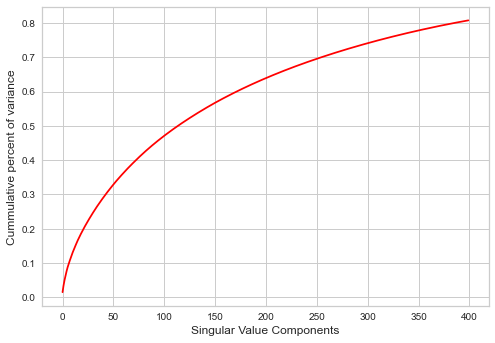

In [89]:
# Dimensionality reduction

svd         = TruncatedSVD(n_components=400)
X_truncated = svd.fit_transform(X)
explained   = svd.explained_variance_ratio_.cumsum()

plt.xlabel('Singular Value Components', size=12)
plt.ylabel('Cummulative percent of variance', size=12)
plt.plot(explained, '-', color='red');

- 400 singular value components are able to explain > 80% information contained 

In [90]:
X_truncated = pd.DataFrame(X_truncated, index=index)
X_truncated

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Product_Name,,,,,,,,,,,,,,,,,,,,,
Women's adidas Originals NMD_Racer Primeknit Shoes,0.285700,-0.146512,0.008578,-0.009405,-0.033522,-0.075848,0.044801,0.043966,0.054603,-0.095307,...,-0.024888,0.024475,0.036053,-0.009470,-0.056036,-0.065600,0.013476,-0.003783,0.009319,-0.030191
Women's adidas Originals Sleek Shoes,0.218906,-0.308964,0.096031,0.164920,-0.056115,0.012187,-0.001960,-0.033771,-0.021149,-0.006630,...,-0.027015,-0.003600,0.004644,0.009083,0.001028,-0.002501,0.003428,0.001620,0.011396,-0.014160
Women's adidas Swim Puka Slippers,0.188229,0.034587,0.273963,-0.049098,-0.026268,0.070169,-0.032377,0.010094,0.044726,-0.043214,...,-0.035440,0.034662,-0.025767,-0.005791,-0.027781,-0.007833,-0.006009,0.017721,0.028845,-0.037506
Women's adidas Sport Inspired Questar Ride Shoes,0.343276,-0.119798,-0.078087,-0.065301,-0.044803,-0.154429,0.078520,0.157333,0.020678,-0.102747,...,-0.019510,-0.025393,0.001601,0.019883,-0.037047,0.000438,0.022666,0.021052,0.009483,-0.000685
Women's adidas Originals Taekwondo Shoes,0.179590,-0.114938,0.056864,-0.019998,0.004496,-0.048068,-0.125313,-0.031538,0.026378,0.113034,...,0.004515,-0.012081,-0.008582,0.028427,-0.008189,0.000024,-0.015619,0.021618,0.011478,0.008287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nike Tiempo Legend 8 Academy TF,0.085190,-0.034094,0.081436,-0.019677,0.089018,0.042509,-0.058372,0.002727,0.036880,-0.006399,...,0.021648,0.005591,0.012473,-0.022724,0.005249,0.018267,0.032188,0.035438,-0.002785,-0.034297
Nike React Metcon AMP,0.165041,-0.008693,0.025603,-0.084661,0.178574,0.017440,-0.021893,0.004856,0.046264,0.020771,...,0.007153,0.048194,0.023712,0.000960,0.003041,-0.035575,0.003872,-0.025672,-0.019445,0.051303
Air Jordan 8 Retro,0.073296,-0.118819,0.045401,0.007176,0.138145,0.040530,0.002941,-0.043908,0.030135,-0.040976,...,0.032389,0.042511,0.018294,-0.010585,-0.033805,0.017821,0.004542,-0.052967,0.001515,-0.004439


- We have reduced the number of content vectors from 3206 to 400 for each Product_Name

In [91]:
# Write a function to generate product recommendations

def generate_recommendations(productName):
    
    '''
    This function takes as input a productName & returns top 5 
    similar products. Similarity here is measured solely using 
    the description column (i.e., content based recommendation)
    '''
    
    # Calculate similarity score
    try:
        a1    = np.array(X_truncated.loc[productName]).reshape(1,-1)
        score = cosine_similarity(X_truncated, a1).reshape(-1)
    except:
        # in case of duplicate Product_Name(s) in the dataset
        a1    = np.array(X_truncated.loc[productName].head(1)).reshape(1,-1)
        score = cosine_similarity(X_truncated, a1).reshape(-1)
    
    recommendations = pd.DataFrame(score, index=index, columns=['score'])
    
    print('Top 5 recommendations similar to this product description are:')
    
    recommendations_list = recommendations.sort_values(by='score', ascending = False).head(6).index
    
    for item in range(1,len(recommendations_list)): # exclude the product itself
        print(recommendations_list[item])

#### Let's test the function

In [92]:
List_Product_Names = list(df['Product_Name'])
List_Product_Names 

["Women's adidas Originals NMD_Racer Primeknit Shoes",
 "Women's adidas Originals Sleek Shoes",
 "Women's adidas Swim Puka Slippers",
 "Women's adidas Sport Inspired Questar Ride Shoes",
 "Women's adidas Originals Taekwondo Shoes",
 "Women's adidas Sport Inspired Duramo Lite 2.0 Shoes",
 "Women's adidas Sport Inspired Duramo Lite 2.0 Shoes",
 "Women's adidas Swim Puka Slippers",
 "WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES",
 "Men's adidas Originals Forest Grove Shoes",
 "Women's adidas Originals Swift Run Shoes",
 "Women's adidas Originals Continental Vulc Shoes",
 "Women's adidas Running Duramo 9 Shoes",
 "Women's adidas Originals Supercourt Shoes",
 "Men's adidas Sport Inspired Response Trail Shoes",
 "Women's adidas Running Cosmic 2 Shoes",
 "Women's adidas Sport Inspired Storm Runner Shoes",
 "Women's adidas Sport Inspired Quickspike Shoes",
 "WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS",
 "Women's adidas Sport Inspired Lite Racer Shoes",
 "Women's adidas Running Duramo 9 Shoes",
 "Women'

#### (1) productName = 'WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS'

In [93]:
generate_recommendations("WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS")

Top 5 recommendations similar to this product description are:
WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS
Women's adidas Swim Eezay Slippers
Women's adidas Swim Eezay Slippers
Women's adidas Swim Eezay Slippers
Men's adidas Outdoor Adipu 2019 Sandals


At a first glance, the KNN model seems to be performing well. The recommended Product_Names for SWIM Flip Flops are either other Flip Flops, Slippers & Sandals & not sport shoes!

However, product "Women's adidas Swim Eezay Slippers" is repeated thrice. Let's dwell into repeated Product_Names(s) a little deeper with next example

#### (2) productName = 'Women's adidas Originals Sambarose Shoes'

In [94]:
generate_recommendations("Women's adidas Originals Sambarose Shoes")

Top 5 recommendations similar to this product description are:
Women's adidas Originals Sambarose Shoes
Women's adidas Originals Sambarose Shoes
WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES
WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES
WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES


As can be seen sometime's Product_Name(s) are repeated in our database

Let's take a closer look at Product_Name 'Women's adidas Originals Sambarose Shoes'

In [95]:
pd.set_option("display.max_colwidth", -1)

In [96]:
df[df['Product_Name'] == "WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES"]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Description,Rating,Reviews,K_means_segments
248,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,80,50,Adidas ORIGINALS,these shoe transform the samba s classic silhouett into trendi platform sneaker with a feminin twist built with a snakeskin emboss leather upper they featur a stack platform outsol that add to the fashion style,4.3,66,1
386,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,96,40,Adidas ORIGINALS,these sneaker rework the samba s classic soccer silhouett a a stylish platform shoe the leather upper is stack on top of a rais gum rubber outsol to add height soft smooth feel an all leather upper leather tongu and synthet leather line add lux comfort platform gum rubber outsol the layer outsol add one inch of height,4.9,54,1
959,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,80,50,Adidas ORIGINALS,these sneaker rework the samba s classic soccer silhouett a a stylish platform shoe the leather upper is stack on top of a rais gum rubber outsol to add height soft smooth feel an all leather upper leather tongu and synthet leather line add lux comfort platform gum rubber outsol the layer outsol add one inch of height,4.2,25,1
969,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,80,50,Adidas ORIGINALS,these shoe transform the samba s classic silhouett into trendi platform sneaker with a feminin twist built with a snakeskin emboss leather upper they featur a stack platform outsol that add to the fashion style,4.9,92,1
970,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,80,50,Adidas ORIGINALS,these shoe transform the samba s classic silhouett into trendi platform sneaker with a feminin twist built with a snakeskin emboss leather upper they featur a stack platform outsol that add to the fashion style,2.7,34,1
1118,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,80,50,Adidas ORIGINALS,these shoe transform the samba s classic silhouett into trendi platform sneaker with a feminin twist built with a snakeskin emboss leather upper they featur a stack platform outsol that add to the fashion style,5.0,17,1
1121,WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES,160,96,40,Adidas ORIGINALS,these sneaker rework the samba s classic soccer silhouett a a stylish platform shoe the leather upper is stack on top of a rais gum rubber outsol to add height soft smooth feel an all leather upper leather tongu and synthet leather line add lux comfort platform gum rubber outsol the layer outsol add one inch of height,3.6,0,1


Of the repeated records for "WOMEN'S ADIDAS ORIGINALS SAMBAROSE SHOES", some of the descriptions are repeated whereas others are not. Regardless, this is intutive proof that KNN algorithm is performing well

#### (3) productName = 'Nike Air Max Plus III'

In [98]:
generate_recommendations("Nike Air Max Plus III")

Top 5 recommendations similar to this product description are:
Nike Air Max Plus III
Nike Air Max 270 Flyknit
Nike Air Max 97 On Air Jasmine Lasode
Nike Air Max 95 Print
Nike Air Max 270 SE


- The recommendations generated for Nike Air Max Plus III are other Nike Air Max products - 270 Flyknit, 97 on Air Jasmine Lasode, 95 Print & 270 SE

### Summary & Conclusion

### Product Clustering

- K-Means Clustering was used to segment all the shoes into 4 different segments 
    - One of the segments [Cluster0] was found to be a lower end-mid segment price range with no discounts, another [Cluster1] with discounts around 50%. These are ideal targets for daily sales & year-end/special-occasion discounted sales respectively
    - The remaining two segments were found to be high end segment price range with one fairing well in terms of rating & number of reviews [Cluster2] and another fairing poorly [Cluster3]. The former requires targeted marketing to attract premium customers while later requires gathering consumer feedback for further product improvements
    - It was observed that Nike shoes on average have no discounts (0%) while adidas shoes across all brands CORE/NEO, SPORTS PERFORMANCE & ORIGINALS offer discounts
    - Cluster0 & Cluster1 were dominated by Adidas CORE/NEO while Cluster3 & Cluster4 by Nike shoes
 
 
### Product Segmentation
 
 - Several different algorithms like Logistic Regression, Decision Tree, Random Forest, Bagging Classifier, Gradient Boost, XGBoost, Stacking Classifier, Neural Network were used to make predictions for cluster segments accounting for target frequency imbalance. Cross validation was performed, the Logistic Regression & XGBoost models were tuned to find the best hyperparameters
- Hyperparameter tuned XGBoost was able to achieve the best score of 0.993 for accuracy & F1 on unseen test set
- The models perform well, this is intutive as the K-Means assigns the targets based on the feature space which is again the input space for XGBoost
- Discount, Listing_Price, Rating are the top 3 attributes used by the model to predict product segments which is consistent with what was observed with K-Means Clustering


### Product Recommendation (Content-based)

- An ML approach is taken to recommend products similar to a product's description
    - The product's description which is primarily text is converted to a numerical feature space using TF-IDF vectorizer. The number of dimensions are reduced using TruncatedSVD retaining ~80% of original data variance
    - KNearestNeighbors is used to find the closest products to a given product in the truncated numerical feature space. The recommendations make intuitive sense giving confidence in the ML predictions

### Next Steps

- More data can be collected to track the products price & discount over 'time', and how the time could impact clustering of shoes into different segments. Models can also be built to forecast sales
- If possible the reviews themselves can be collected. Text analytics can be performed to find the specific words or tags associated with each cluster. E.g., analysis of reviews especially for shoes in Cluster3 with very low ratings can be useful to inform product improvements 